<a href="https://colab.research.google.com/github/kio15978/colab/blob/main/%EC%9C%A0%ED%8C%90%EB%8D%B0_10w_%EC%99%80%EC%9D%B8_%ED%92%88%EC%A7%88_%EC%98%88%EC%B8%A1_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **유판데 10w - 와인 품질 예측 통계 분석**



---



# **< 데이터 준비 >**

## **1. csv 파일 다운로드**

**테이블 형태의 csv 파일을 다루기 위해**

**pandas 라이브러리 패키지를 pd 이름으로 로드**

In [130]:
import pandas as pd

**pandas의 read_csv() 함수를 사용해 csv 파일을 읽어옴**

**csv 파일 데이터의 열 구분자를 세미콜론으로 지정하기 위해** 

**sep 매개변수 값을 ';'로 지정**

In [131]:
red_df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';',header=0,engine='python')

In [132]:
white_df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';',header=0,engine='python')

\

## **2. 데이터 병합하기 - 레드 와인과 화이트 와인 파일 합치기**

### **레드 와인 파일 읽고, 데이터프레임에 'type'열 삽입**

**red_df에 저장된 내용을 위에서부터 5개(0~4번) 행만 출력하여 확인**

In [133]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**이름이 'type'이고 값이 'red'인 열을 만들어 index=0(첫번째 열) 자리에 삽입**

In [134]:
red_df.insert(0, column='type', value='red')

In [135]:
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**shape 이용 red_df 크기 (행 개수, 열 개수) 형태로 확인**

In [136]:
red_df.shape

(1599, 13)

### **화이트 와인 파일 읽고, 데이터프레임에 'type'열 삽입**

**white_df에 저장된 내용을 위에서부터 5개(0~4번) 행만 출력하여 확인**

In [137]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**이름이 'type'이고 값이 'white'인 열을 만들어 index=0(첫번째 열) 자리에 삽입**

In [138]:
white_df.insert(0, column='type', value='white')

In [139]:
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**shape 이용 white_df 크기 (행 개수, 열 개수) 형태로 확인**

In [140]:
white_df.shape

(4898, 13)

### **red_df와 white_df를 하나의 데이터프레임 형식으로 결합**

**pd.concat() 함수 이용 red_df, white_df 결합**

In [141]:
wine = pd.concat([red_df, white_df])

**결합된 wine 크기 (행 개수, 열 개수) 형태로 확인**

In [142]:
wine.shape

(6497, 13)

\

# **< 데이터 탐색 >**

## **1. 기본 정보 확인**

**◆ .info() 데이터 전반적인 정보**

***df 구성하는 행, 열 크키, 칼럼명, 컬럼 구성 자료형 등 출력***

In [143]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


-> 전체 샘플 수 6497, 열 13, 각 속성 이름 type ~ quality까지

속성 중 실수타입(float64) 11개, 정수타입(int64) 1개 객체타입(object) 1개

독립변수 (x)는 type부터 achool까지 12개, 종속변수(y)는 quailty 1개

### **데이터프레임 다운로드**

In [144]:
from google.colab import files
wine.to_csv('wine.csv')
files.download('wine.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **2. 함수를 사용해 기술 통계 구하기**

**열 이름에 공백이 있으면 _ 로 바꾼 뒤 한 단어로 연결**

In [145]:
wine.columns = wine.columns.str.replace(' ','_')

In [146]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**◆ .describe() 데이터 요약**

***속성별 개수, 평균, 표준편차, 최소값, 전체 데이터 백분율에 대한 25번째 백분위 수(25%)***

***중앙값이 50번째 백분위수(50%), 75번쨰 백분위수(75%) 그리고 100번째 백분위수인 최대값 max 출력***

In [147]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**◆ .unique()  wine.quality 속성 값 중 유일한 값 출력**



In [148]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

-> 와인 품질 등급은 3,4,5,6,7,8,9   총 7개 등급이 있음

**◆ .value_counts() quality 속성값에 대한 빈도수**

In [149]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

-> 6등급인 샘플이 2836 개로 가장 많고
  
   9등급인 샘플이 5개로 가장 적음

\

# **< 데이터 모델링 >**

## **1. describe() 함수로 그룹 비교**

**레드와인 - 화이트 와인 구분 속성인 type을 기준으로 그룹을 나눈 뒤**

**그룹 안에서 quailty 송성을 기준으로 기술 통계 구함**

In [150]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


**mean() 평균**

In [151]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

**std() 표준편차**

In [152]:
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

기술 통계 전부를 구할 때는 describe 함수 사용하지만

maen(), std() 통해 평균, 표준편차만 따로 구할 수 있음

**agg() 함수 통해 mean(), std() 함수 묶어서 한 번에 사용**

In [153]:
wine.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


## **2. t-검정과 회귀 분석으로 그룹 비교**



*   **t-검정을 위해서 scipy 라이브러리 패키지 사용**

*   **회귀분석을 위해 statmodels 라이브러리 패키지 사용**


**statsmodels 패키지 설치**

In [154]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**t-검정에 필요한 scipy 패키지의 stats 함수 로드**

In [155]:
from scipy import stats

**회귀 분석에 필요한 statmodels.formula.api 패키지의 ols, glm 함수 로드**

In [156]:
from statsmodels.formula.api import ols, glm

### **그룹 분리 / t-test**

**◆.loc() 행/열 데이터 조회**

***소괄호 x 대괄호[ ]***

***첫번쨰 - 행 정보 , 두번째 - 열 정보***
​

**레드 와인 샘플의 quality 값만 찾아서 red_wine에 저장**

In [157]:
red_wine_quality = wine.loc[wine['type']=='red','quality']

**화이트 와인 샘플의 quality 값만 찾아서 white_wine에 저장**

In [158]:
white_wine_quality = wine.loc[wine['type']=='white','quality']

**scipy 패키지의 stats.ttest_ind() 함수 사용 t-검정을 하고 두 그룹 간 차이 확인**

**◆ equal_var = False 매개변수**

***True(기본값) 동일한 모집단 분산 가정하는 표준 독립 2표본 검정 수행***

***False 도일한 모집단 분산을 가정하지 않는 welch의 t-검정 수행***

In [159]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

### **선형 회귀 분석 수행**



**선형 회귀 분석식의 종속변수(y), 독립변수(x1 ~ x10) 구성**

In [160]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid +residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide +density + pH + sulphates + alcohol'

-> quality 종속(타깃)변수  ~  나머지 독립(설명)변수

**선형 회귀 모델 중 OLOSrdinary Least Squares 모델 사용**

In [161]:
regression_result = ols(Rformula, data=wine).fit()

**선형 회귀 분석과 관련된 통계값 출력**

In [162]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        07:47:15   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-> intercept 절편  그 아래 나머지 설명변수

R-squared 모델이 얼마나 변동 잘 설명하는지 %

## **3. 회귀 분석 모델로 새로운 샘플의 품질 등급 예측**

### **예측에 사용할 첫 번째 샘플 데이터 만들기**

**◆ .difference 차집합**

**wine에서 quality, type 열 제외하고,**

**회귀 분석 모델에 사용할 독립변수만 추출하여 sample에 저장**

In [163]:
sample1 = wine[wine.columns.difference(['quality','type'])]

**sample1에 있는 샘플 중에서 0~4번 5개 샘플만 추출**

In [164]:
sample1 =sample1[0:5][:]

### **첫 번째 샘플의 quality 예측**

**샘플 데이터를 회귀 분석 모델 regression_result의 예측함수 predict()에 적용하여**

**수행한 뒤 결과 예측값을 sample1_predict에 저장**

In [165]:
sample1_predict = regression_result.predict(sample1)

**sample1_predict 출력하여 예측한 quality 확인 (예측)**

In [166]:
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

**wine에서 0~4번까지 샘플의 quality 출력하여 sample1_predict 맞게 예측했는지 확인 (실제 등급)**

In [167]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## **예측에 사용할 두 번째 샘플 데이터 만들기**

**회귀식에 사용한 독립 변수에 대입할 임의의 값을 딕셔너리 형태로 제작**

In [168]:
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5], "citric_acid":[0.3, 0.4],  "residual_sugar":[6.1, 5.8], "chlorides":[0.055,0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0,99], "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],"alcohol":[9.0, 0.88] }

**딕셔너리 형태의 값과 sample1의 열 이름만 뽑아 데이터프레임으로 묶음 sample2 제작**

In [169]:
sample2 = pd.DataFrame(data, columns = sample1.columns)

In [170]:
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


## **두 번째 샘플의 quality 예측**

**샘플 데이터를 회귀 분석 모델 regression_result의 예측함수 predict()에 적용하여 수행 한 뒤**

**결과 예측값을 sample2_predict에 저장**

In [171]:
sample2_predict = regression_result.predict(sample1)

**sample2_predict를 출력하여 예측한 quailty 확인**

In [172]:
sample2_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

\

# **< 결과 시각화 >**

## **1. 와인 유형에 따른 품질 등급 히스토그램 그리기**

**seaborn 라이브러리 패키지 설치**

In [173]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**시각화에 필요한 패키지 로드**

In [174]:
import matplotlib.pyplot as plt

In [175]:
import seaborn as sns

### **커널 밀도 추정(kde) 적용한 히스토그램 그리기**

**히스토그램 차트 배경색 스타일 설정**

In [176]:
sns.set_style('dark')

**레드 와인에 대한 distplot 객체 생성**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


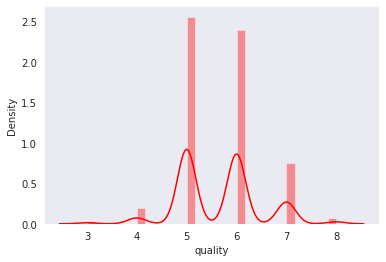

In [177]:
sns.distplot(red_wine_quality, kde=True, color='red', label='red wine')

**화이트 와인에 대한 distplot 객체 생성**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


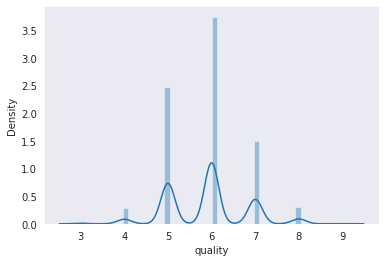

In [178]:
sns.distplot(white_wine_quality, kde=True, label='white wine')

**차트 제목 설정**

Text(0.5, 1.0, 'Quality of Wine Type')

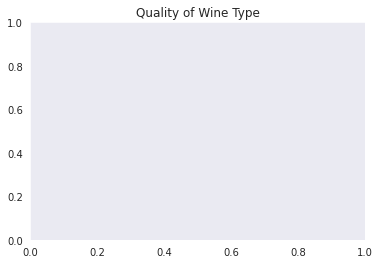

In [179]:
plt.title("Quality of Wine Type")

**차트 범례 설정**

No handles with labels found to put in legend.


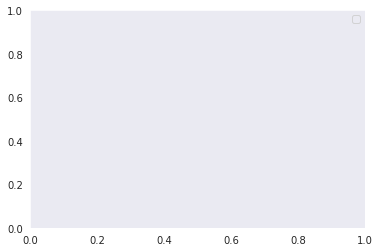

In [180]:
plt.legend()

**설정한 내용대로 차트 표시**

In [181]:
plt.show()

-> x축 : quality

y축 : 확률 밀도 함수값

## **2. 부분 회귀 플롯으로 시각화**

● 독립 변수가 2개 이상인 경우에는 부분 회귀 플롯을 사용하여 

하나의 독립변수가 종속변수에 미치는 영향력을 시각화 함으로써 결과를 분석할 수 있음



**부분 회귀 계산을 위해 statsmodels.api 로드**

In [182]:
import statsmodels.api as sm

### **fixed_acidity가 종속 변수 quality에 미치는 영향력 시각화**

**부분 회귀에 사용한 독립변수와 종속변수를 제외한 나머지 변수 이름을 리스트 others로 추출**

**◆ list(set())을 이용한 중복제거**

***set은 리스트의 고유값을 집합으로 반환***

***이를 리스트로 변환하려면 list() 함수를 사용***

In [183]:
others = list(set(wine.columns).difference(set(["quality","fixed_acidity"])))

**나머지 변수는 고정하고 fixed_acidity가 종속 변수 quality에 미치는 영향에 부분회귀 수행**

**◆ sm.graphics.plot_partregress 부분 회귀 플롯 그림**

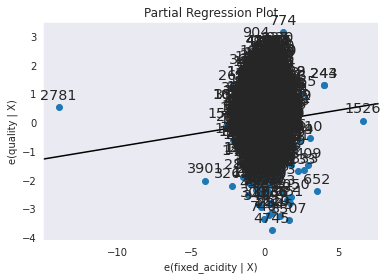

In [184]:
p, resids = sm.graphics.plot_partregress("quality","fixed_acidity", others, data=wine, ret_coords=True)

**부분 회귀의 결과를 프롯으로 시각화**

In [185]:
plt.show()

### **각 독립변수가 종속변수 quality에 미치는 영향력 시각화**

**차트의 크기 지정**

In [186]:
fig = plt.figure(figsize=(8,13))

<Figure size 576x936 with 0 Axes>

**다중 선형 회귀 분석 결과를 가지고 있는 regression_result 이용**

**각 독립변수의 부분 회귀 플롯을 구함**

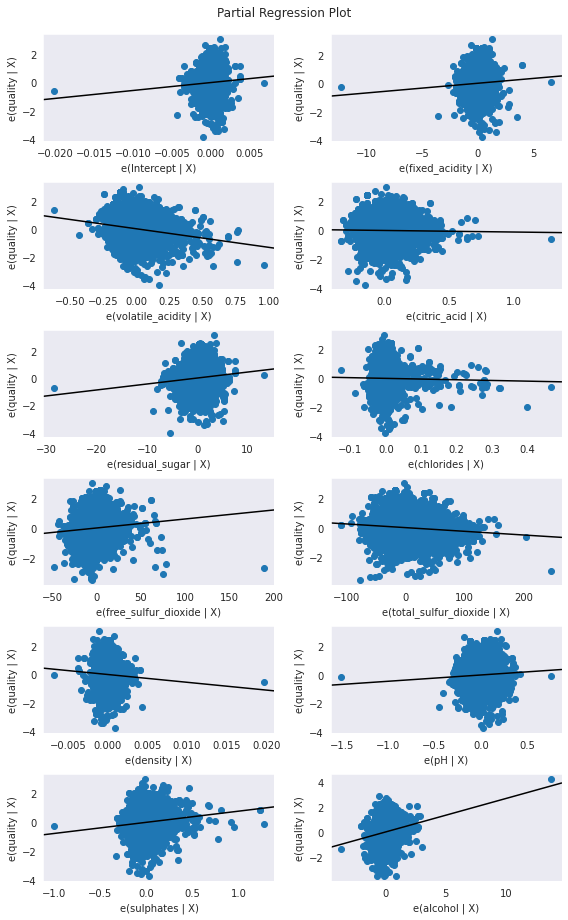

In [187]:
sm.graphics.plot_partregress_grid(regression_result, fig = fig)

In [188]:
plt.show()